## Adam Mischke
## CSCI 4850/5850 - Neural Networks
## Open Lab 2 - Multi-Layer Networks
## Due: Feb. 27 @ 11:00pm

### Library Imports

In [317]:
# pandas
import pandas as pd

# numpy
import numpy as np

# visualizations
from IPython.display import SVG
from IPython.display import display
from keras.utils.vis_utils import model_to_dot

# printing
from sympy import *
init_printing(use_latex=True)

# for plotting and graphing
import matplotlib.pyplot as plt
%matplotlib inline

# neural net tools
import keras
# check Using TensorFlow backend.


### XOR Multi-layer Agent Class

In [320]:
class XOR_Agent():
    
    ## initialization:
    def __init__(self):
        # XOR data set
        self.X = np.array([ [-1,-1], [-1,1], [1,-1], [1,1] ])
        display('input:', Matrix(self.X))

        self.Y = np.array( [0,1,1,0] )
        display('output:', Matrix(self.Y))
        
    def build(self, verbose=True, relu_units=2, extra_relu_layers=0):
        # binary cross-entropy error then follows a sigmoid activation function
        
        # set the number of input ReLU layers
        loss=keras.losses.binary_crossentropy
        
        optimizer=keras.optimizers.Adam()
        
        bias_initializer=keras.initializers.RandomUniform()

        # multi-layer net with ReLU hidden layer
        self.model = keras.models.Sequential()
        self.model.add(keras.layers.Dense(relu_units,input_dim=2,activation='relu',
                                          bias_initializer=bias_initializer))
        
        # creates a variable amount of extra hidden ReLU layers
        for x in range(0,extra_relu_layers):
            self.model.add(keras.layers.Dense(relu_units, activation='relu'))
        
        # finish the model with a sigmoid activation
        self.model.add(keras.layers.Dense(1, activation='sigmoid'))
        
        # include activation!!
        self.model.compile(loss=loss, optimizer=optimizer,
                           metrics=['accuracy'])
        
        if verbose is True:
            print(self.model.summary())
        
    def set_weights(self, verbose=True):
        # set random weights for the 2 dense layers
        for i in self.model.get_weights():
            if verbose is True:
                display(Matrix(i))
                    
    def plot_initial_space(self):
        # sample plot of classification space
        xpoints = np.linspace(-2,2, 20)
        ypoints = np.linspace(-2,2, 20)
        xgrid, ygrid = np.meshgrid(xpoints, ypoints)
        self.positions = np.vstack([xgrid.ravel(),ygrid.ravel()]).T

        # green points are where we will evaluate the network outputs
        plt.plot(self.positions[:,0], self.positions[:,1], 'go')

        # color the 0 outputs to XOR red
        plt.plot(self.X[[0,3],0], self.X[[0,3],1], 'ro', markersize=10)
        # color the 1 outputs to XOR blue
        plt.plot(self.X[[1,2],0], self.X[[1,2],1], 'bo', markersize=10)
        plt.title('Default XOR Space')
        plt.show()
        
    def plot_space(self, title):
        # color the points by the classification labels:
        predictions = self.model.predict_classes(self.positions)[:,0]
        zeros = self.positions[predictions==0,:]
        ones = self.positions[predictions==1,:]

        # color predictions by class
        plt.plot(zeros[:,0],zeros[:,1],'ro')
        plt.plot(ones[:,0],ones[:,1],'bo' )

        # color the zero-expected outputs red
        plt.plot(self.X[[0,3],0],self.X[[0,3],1],'ro',markersize=10)
        # color the one-expected outputs blue
        plt.plot(self.X[[1,2],0],self.X[[1,2],1],'bo',markersize=10)
        plt.title(title)

        # show the decision boundary and points
        plt.show()
        
    def train(self, verbose=False, epochs=1000, batch_size=1):

        # training time!
        self.history = self.model.fit(self.X, self.Y,
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=verbose)
        
    def show_loss(self):
        # summary for the loss
        plt.plot(self.history.history['loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train'], loc='upper left')
        plt.show()
        
    # displays the performance for the model
    def show_performance(self, verbose=True):
        score = self.model.evaluate(self.X, self.Y, verbose=verbose)
        self.loss = score[0]
        self.accuracy = score[1]
        if verbose is True:
            print('Loss:', self.loss)
            print('Accuracy', self.accuracy)


### 1. Multi-layer net solving XOR with ReLU with 100% accuracy

'input:'

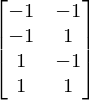

'output:'

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_990 (Dense)            (None, 64)                192       
_________________________________________________________________
dense_991 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_992 (Dense)            (None, 1)                 65        
Total params: 4,417
Trainable params: 4,417
Non-trainable params: 0
_________________________________________________________________
None


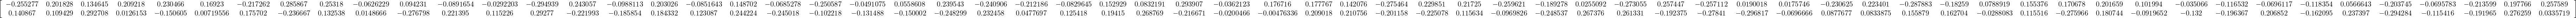

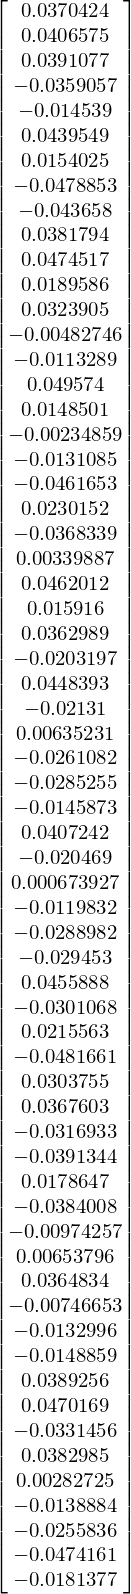

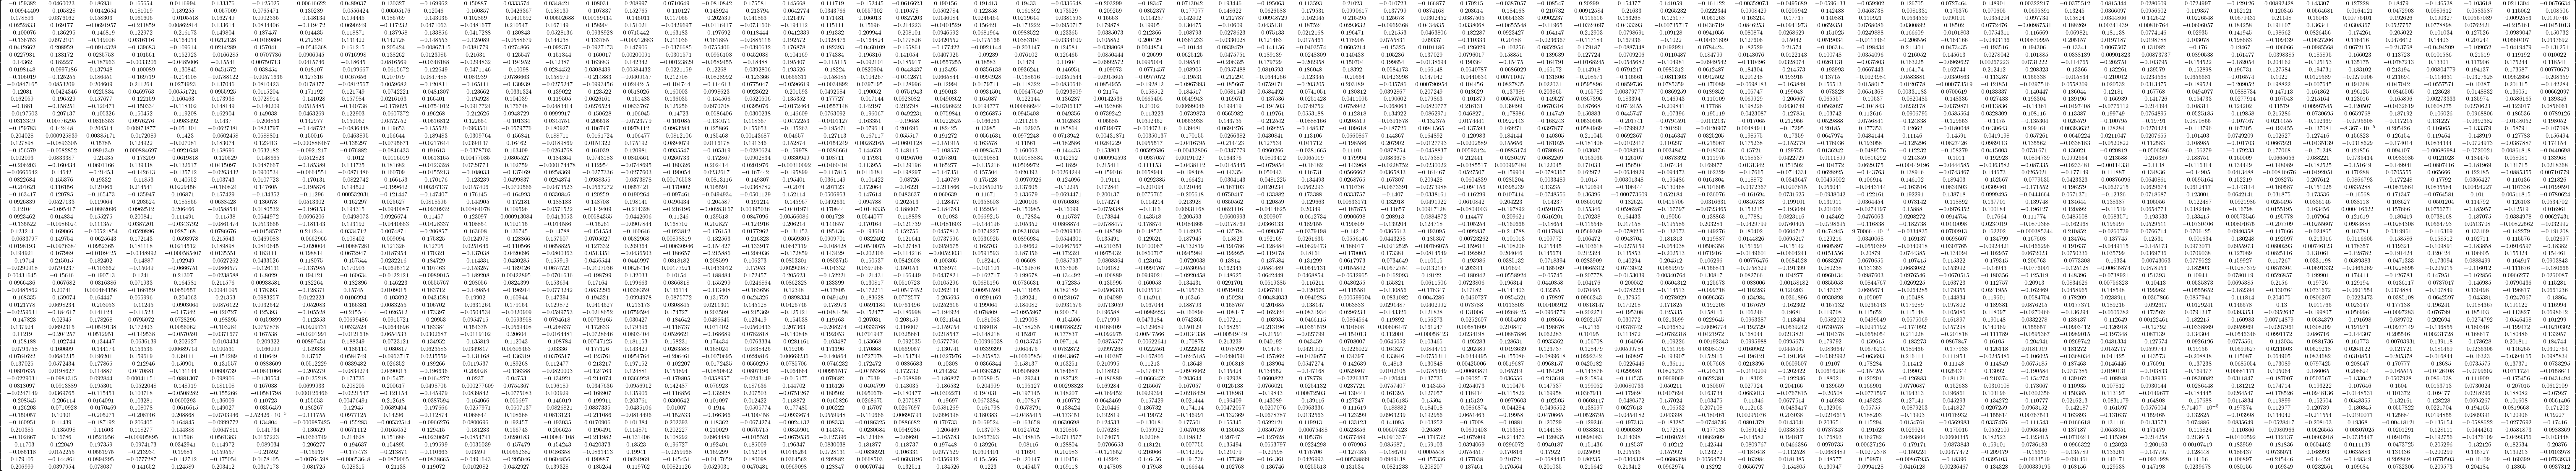

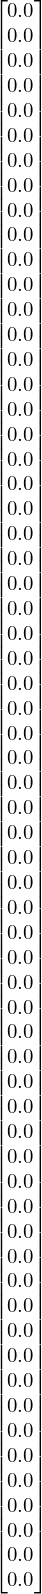

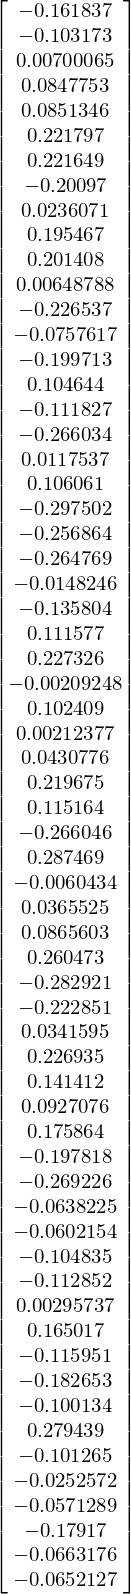

In [321]:
xor = XOR_Agent()
xor.build(relu_units=64, extra_relu_layers=1)
xor.set_weights(verbose=True)

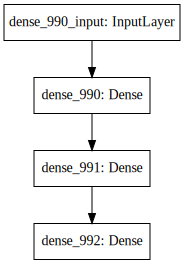

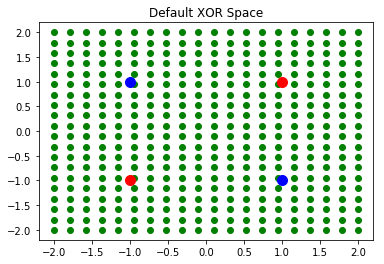

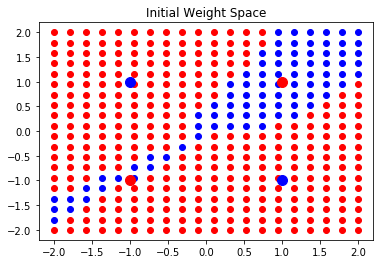

In [322]:
display(SVG(model_to_dot(xor.model).create (prog='dot', format='svg')))
xor.plot_initial_space()
xor.plot_space('Initial Weight Space')

In [323]:
xor.train(verbose=2, epochs=16, batch_size=1)

Epoch 1/16
 - 17s - loss: 0.7544 - acc: 0.2500
Epoch 2/16
 - 0s - loss: 0.7178 - acc: 0.5000
Epoch 3/16
 - 0s - loss: 0.6918 - acc: 0.5000
Epoch 4/16
 - 0s - loss: 0.6652 - acc: 0.7500
Epoch 5/16
 - 0s - loss: 0.6399 - acc: 1.0000
Epoch 6/16
 - 0s - loss: 0.6185 - acc: 1.0000
Epoch 7/16
 - 0s - loss: 0.5956 - acc: 1.0000
Epoch 8/16
 - 0s - loss: 0.5744 - acc: 1.0000
Epoch 9/16
 - 0s - loss: 0.5542 - acc: 1.0000
Epoch 10/16
 - 0s - loss: 0.5347 - acc: 1.0000
Epoch 11/16
 - 0s - loss: 0.5148 - acc: 1.0000
Epoch 12/16
 - 0s - loss: 0.4955 - acc: 1.0000
Epoch 13/16
 - 0s - loss: 0.4766 - acc: 1.0000
Epoch 14/16
 - 0s - loss: 0.4591 - acc: 1.0000
Epoch 15/16
 - 0s - loss: 0.4411 - acc: 1.0000
Epoch 16/16
 - 0s - loss: 0.4230 - acc: 1.0000


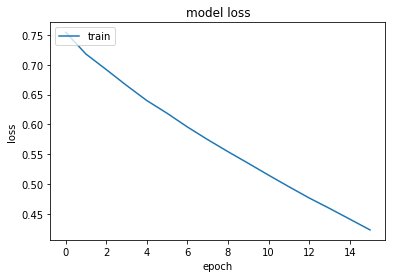

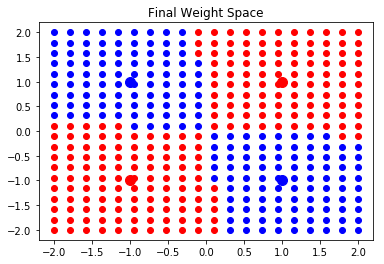

4/4 [==============================] - 6s 2s/step
Loss: 0.410594046116
Accuracy 1.0


In [324]:
xor.show_loss()
xor.plot_space('Final Weight Space')
xor.show_performance()

### 1A.
I made 3 dense layers for ReLU making the total parameters to be quite large, 4,417 units. However, the netowrk converges extremely quickly, most times before 10 epochs.<br>
<b>Model Loss Curve:</b> The model loss gives a nice curve. If we lowered the epochs, the curve would be less skewed.<br>
<b>Decision Boundary:</b> We can see the decision boundary as it gracefully performs as 100% testing for the 4 points.<br>


### 2. Describe the network architecture, optimizer, hyperparameters that made #1 succeed

#### Network Architecture:
I used 3 Dense layers, the ReLU input layer with a sigmoid finishing layer:

<b>1st layer:</b> dense, ReLU activation, the shape being 64 units tall with 192 parameters.<br>
<b>2nd layer:</b> dense, ReLU activation, the shape being 64 units tall with 4160 parameters.<br>
<b>3rd layer:</b> dense, sigmoid activation, 1 output shape with 65 parameters.<br>
The total parameters ended up being 192+4160+65=4,417<br>
More units ended up making the network converge to 100% sooner.

#### Optimizer:
I kept the adam optimizer for gradient descent considering it's a good general optimizer. I had consistent success with quick convergence.

#### Hyperparameters:
<b>Epochs:</b> With how many units dense my input ReLU layer was, my epochs ended up being pretty low. I found a pretty consistent spot around 16 epochs to reach solid convergence to 100%.<br>
<b>Batch Size:</b> I tried different numbers of batch sizes. It seemed like the more batch sizes I used, the more epochs I needed to use. So I kept it at 1.

### 3. Shrink down the size of the network to the smallest number of ReLU units that can still show 100% convergence

In [ ]:
""" 
Initially, I ran this a couple times making sure ReLU units had to be > 2

# units > 2, 2 did not work @ >1024 epochs
# lower bound epics ~ 152 
# upper bound epics - >1024
xor.build(relu_units=3)
xor.set_weights()
xor.plot_initial_space()
xor.plot_space()
xor.train(verbose=2, epochs=512, batch_size=1)

"""

# Dr. Phillips, you don't have to run this.

# BIAS Initializer set to keras.initializers.Constant(0.1)
# 10 rounds:
# when I ran 3 relu units, i got that ~20% (2/10) of them didn't go to 100%
# after 1024 epochs, but that also could have been because they overfitted
# 100 rounds:
# ~37% failed (37/100) at gaining 100% accuracy

# bias initializer with uniform random distribution
# 100 rounds:
# ~39% failed (39/100)
"""
didnt_make_it = 0
verbose = False

for x in range(0,100):
    xor.build(verbose=verbose, relu_units=3)
    xor.set_weights(verbose=verbose)
    xor.train(verbose=verbose, epochs=1024, batch_size=1)
    xor.show_performance(verbose=verbose)
    if xor.accuracy < 1.0:
        didnt_make_it+=1
        print('didnt make it:', didnt_make_it)
print('% did not make it:', (didnt_make_it / 100) * 100.0 )
"""

# Please run this code again and the following code if the accuracy is not 100%
# This does take a minute, be patient!

found = 0
while not found:
    xor.build(relu_units=3, verbose=False)
    xor.set_weights(verbose=False)
    xor.train(verbose=False, epochs=1024, batch_size=1)
    if xor.accuracy is 1.0:
        found == 1
    else:
        print('Trying again..')
print('Finished.')

Trying again..
Trying again..


In [ ]:
xor.show_loss()
xor.plot_space('Final Weight Space')
xor.show_performance()

### 3A.
From above, you can see that it took 3 ReLU units in a 2 dense layer network to solve the problem. 1024 epochs solved it <b>~39%</b> of the time, with 2 never solving it. This is with the assumption that I may have needed more epochs to train, but I don't think it would have helped.

<b>Model Loss Curve:</b> The model loss gives a curvy curve. Looking more sharp at the lower epochs, then gradually evening out.<br>
<b>Decision Boundary:</b> We can see the decision boundary as it performs mediocrely as 100% testing for the 4 points.<br>
<b>Smallest Number of Units:</b> Adding up the units, 3+2= <b>5 units</b>, we can safely say the network requires 5 units to learn the XOR problem<br>

### 4. Describe why the choice of using ReLU activation function for the hidden units might maker your networks larger or smaller in size.

### 4A.

<img src="https://upload.wikimedia.org/wikipedia/en/6/6c/Rectifier_and_softplus_functions.svg"></img><br><center>(1)</center><br>
From wikipedia, we can see the Rectifier activation function (ReLU)<br>
<br>
<b>ReLU</b> is a <b>non-linear</b> activation function.
<b>XOR</b> is a <b>non-linear</b> problem. Had we only used a <b>linear</b> activation function on it through the layers, the network would have failed do to being unable to perform <b>linear</b> regression to solve it.<br><center>(2)</center>
<br>
Sources:<br>
(1) https://upload.wikimedia.org/wikipedia/en/6/6c/Rectifier_and_softplus_functions.svg<br>
(2) https://stackoverflow.com/questions/34556932/xor-gate-with-a-neural-network<br>

In [253]:
# import for MNIST data set
from keras.datasets import mnist

### MNIST Multi-layer Agent Class

In [258]:
class MNIST_Agent:
    ## initialization:
    def __init__(self):

        # digits 0-9, 10 classes
        self.num_classes = 10

        # dimensions
        img_rows, img_cols = 28,28

        # data shuffled and split between train and test sets
        (x_train, y_train,), (x_test, y_test) = mnist.load_data()

        x_train = x_train.reshape(x_train.shape[0], img_rows*img_cols)
        x_test = x_test.reshape(x_test.shape[0], img_rows*img_cols)

        # data normalization 0-255 encoded as 0-1
        self.x_train = x_train.astype('float32')
        self.x_test = x_test.astype('float32')
        self.x_train /= 255.0
        self.x_test /= 255.0

        # convert class vectors to binary class matrices
        self.y_train = keras.utils.to_categorical(y_train, self.num_classes)
        self.y_test = keras.utils.to_categorical(y_test, self.num_classes)

        # shape information
        print('x_train shape:', self.x_train.shape)
        print('y_train shape:', self.y_train.shape)
        print(self.x_train.shape[0], 'train samples')
        print(self.x_test.shape[0], 'test samples')
    
    def build(self, activation, extra_layers=1, num_units=1):
        # multi-layer net with ReLU hidden layer
        self.model = keras.models.Sequential()
        loss=keras.losses.categorical_crossentropy
        optimizer=keras.optimizers.Adam()
        bias_initializer=keras.initializers.RandomUniform()

        # linear
        if activation is 'relu':
            for x in range(0,extra_layers):
                self.model.add(keras.layers.Dense(num_units,
                                                  activation='relu',
                                                  bias_initializer=bias_initializer,
                                                  input_shape=[self.x_train.shape[1]]))
            
        elif activation is 'tanh':
            
            for x in range(0,extra_layers):
                self.model.add(keras.layers.Dense(num_units,
                                                  activation='tanh',
                                                  bias_initializer=bias_initializer,
                                                  input_shape=[self.x_train.shape[1]]))

        self.model.add(keras.layers.Dense(self.num_classes,
                                          activation='softmax',
                                          bias_initializer=bias_initializer,
                                          input_shape=[self.x_train.shape[1]]))
        
        self.model.compile(loss=loss,
                      optimizer=optimizer,
                      metrics=['accuracy'])
        
        print(self.model.summary())
        
    def train(self, batch_size=128, epochs=30, verbose=True, validation_split=0.2):
        # training!
        self.vs = validation_split
        self.history = self.model.fit(self.x_train, self.y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=verbose,
                            validation_split=validation_split)
        
    # displays the performance for the model
    def show_performance(self, verbose=True):
        score = self.model.evaluate(self.x_test, self.y_test, verbose=verbose)
        self.loss = score[0]
        self.accuracy = score[1]
        if verbose is True:
            print('Loss:', self.loss)
            print('Accuracy', self.accuracy)
            
    def plot(self):
        plt.figure(1, figsize=(15,15))

        if self.vs is not 1.0:
            # summarize history for accuracy
            plt.subplot(211)
            plt.plot(self.history.history['acc'])
            plt.plot(self.history.history['val_acc'])
            plt.title('model accuracy')
            plt.ylabel('value accuracy')
            plt.xlabel('epoch')
            plt.legend(['train','test'], loc='upper left')

            # summarize history for loss
            plt.subplot(212)
            plt.plot(self.history.history['loss'])
            plt.plot(self.history.history['val_loss'])
            plt.title('model loss')
            plt.ylabel('value loss')
            plt.xlabel('epoch')
            plt.legend(['train','test'], loc='upper left')
        elif:
            


        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
        plt.show()

### 5. Train an Mulit-layer agent on the MNIST dataset with Hyperbolic Tangent units and >98% accuracy. Generate a plot of the history that shows improvement in the validation accuracy. Don't go below 20% validation split. Evaluate the performance on the testing set.

x_train shape: (60000, 784)
y_train shape: (60000, 10)
60000 train samples
10000 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_722 (Dense)            (None, 64)                50240     
_________________________________________________________________
dense_723 (Dense)            (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
None
Train on 30000 samples, validate on 30000 samples
Epoch 1/20
 - 24s - loss: 0.3992 - acc: 0.8904 - val_loss: 0.2598 - val_acc: 0.9241
Epoch 2/20
 - 11s - loss: 0.2083 - acc: 0.9403 - val_loss: 0.2056 - val_acc: 0.9406
Epoch 3/20
 - 11s - loss: 0.1572 - acc: 0.9542 - val_loss: 0.1754 - val_acc: 0.9501
Epoch 4/20
 - 13s - loss: 0.1236 - acc: 0.9649 - val_loss: 0.1650 - val_acc: 0.9517
Epoch 5/20
 - 12s - loss: 0.1024 - acc: 0.9716 - 

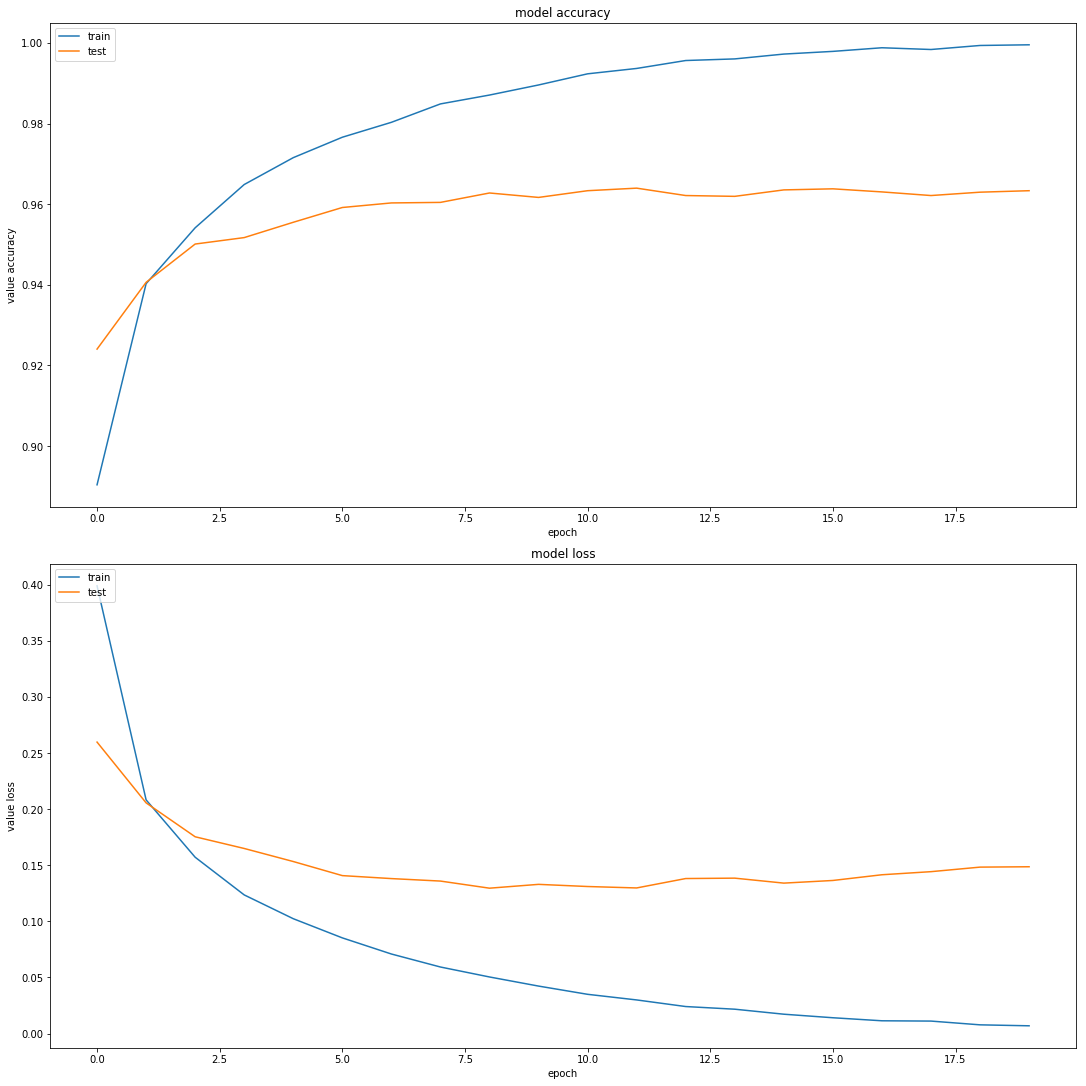

10000/10000 [==============================] - 1s 144us/step
Loss: 0.125023265576
Accuracy 0.9662


In [279]:
MNIST = MNIST_Agent()
# more layers is good, total num params SHOULD <= 250,000
MNIST.build(activation='tanh', extra_layers=1, num_units=512)

# batches = more: faster learning, cap of learning / less: slower learning, no cap?
# epochs = more: slower, greater learning, can overfit / less: faster, lesser learning, can miss the mark
# validation split = more: seems like a cap on learning / 0.2 is good
MNIST.train(batch_size=64, epochs=20, verbose=2, validation_split=0.2)
MNIST.plot()
MNIST.show_performance()

### 5A. 
This one was really hard to hyperparameterize to get to >98%.
I tried increasing the hidden layers and units, which never helped get me to the 98% ledge.
I then tried increasing epochs with those combinations, which only turned into overfitting.
I tried changing the validation split to be higher, but that didn't help really at all. The higher I went, the more of an upper limit there seemed to be.
I finally decreased the batch size, which finally got me over that ledge, but how slow it is!

### 6. Train an Mulit-layer agent on the MNIST dataset with ReLU units with >98% accuracy. Generate a plot of the history that shows improvement in the validation accuracy. Don't go below 20% validation split. Evaluate the performance on the testing set. (Same as 5 except ReLU instead of tanh activation function)

x_train shape: (60000, 784)
y_train shape: (60000, 10)
60000 train samples
10000 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_635 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_636 (Dense)            (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None
Train on 48000 samples, validate on 12000 samples
Epoch 1/16
 - 36s - loss: 0.2505 - acc: 0.9267 - val_loss: 0.1257 - val_acc: 0.9645
Epoch 2/16
 - 25s - loss: 0.1014 - acc: 0.9698 - val_loss: 0.1009 - val_acc: 0.9694
Epoch 3/16
 - 27s - loss: 0.0660 - acc: 0.9805 - val_loss: 0.0866 - val_acc: 0.9728
Epoch 4/16
 - 26s - loss: 0.0452 - acc: 0.9865 - val_loss: 0.0756 - val_acc: 0.9766
Epoch 5/16
 - 26s - loss: 0.0328 - acc: 0.9903 

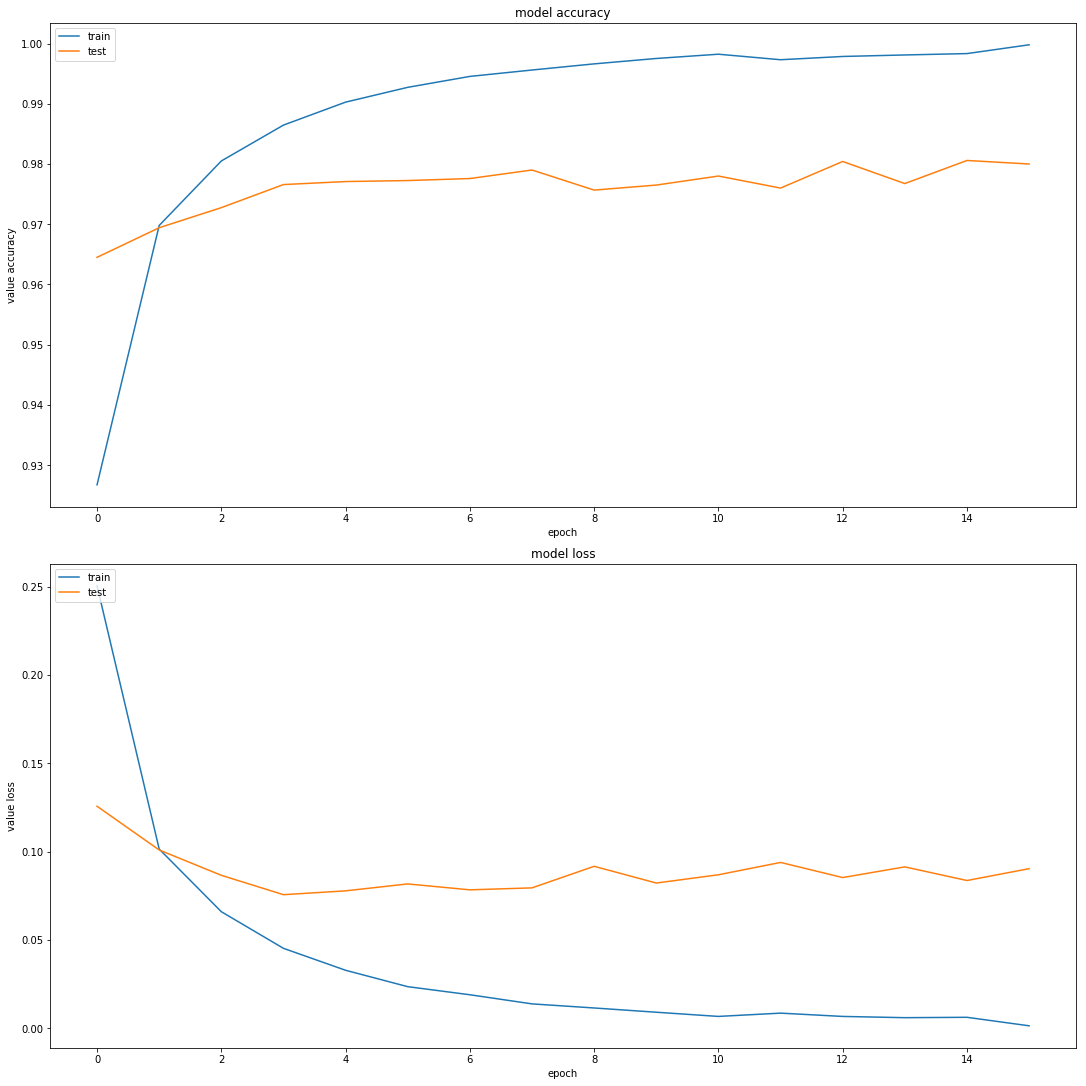

10000/10000 [==============================] - 4s 400us/step
Loss: 0.072308537454
Accuracy 0.9827


In [271]:
MNIST = MNIST_Agent()
# more layers is good, total num params SHOULD <= 250,000
MNIST.build(activation='relu', extra_layers=1, num_units=512)

# >98% with 0.2 validation split
# MNIST.build(activation='relu', extra_layers=1, num_units=512)

# batches = more: faster learning, cap of learning / less: slower learning, no cap?
# epochs = more: slower, greater learning, can overfit / less: faster, lesser learning, can miss the mark
# validation split = more: seems like a cap on learning / 0.2 is good / 1.0 LEARNS THE BEST
MNIST.train(batch_size=64, epochs=16, verbose=2, validation_split=0.2)
MNIST.plot()
MNIST.show_performance()

### 6A.

### 7. Describe the differences between the two learning curves from ReLU and Hyperbolic tangent activation functions for the MNIST dataset.

### 7A.


Source:<br>
https://towardsdatascience.com/exploring-activation-functions-for-neural-networks-73498da59b02

In [ ]:
RelU does better than tanh. Tanh grows slower.